In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [2]:
x_train = pd.read_csv("csvTrainImages 13440x1024.csv",header=None)
y_train = pd.read_csv("csvTrainLabel 13440x1.csv",header=None)

x_test = pd.read_csv("csvTestImages 3360x1024.csv",header=None)
y_test = pd.read_csv("csvTestLabel 3360x1.csv",header=None)

In [3]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()-1

x_test = x_test.to_numpy()
y_test = y_test.to_numpy()-1

In [4]:
print('La taille de data train',x_train.shape,y_train.shape)
print('La taille de data test',x_test.shape,y_test.shape)

La taille de data train (13440, 1024) (13440, 1)
La taille de data test (3360, 1024) (3360, 1)


In [5]:
# Redimensionner les images pour être du même taille
x_train = x_train.reshape(-1,32,32)
x_test = x_test.reshape(-1,32,32)
# Normalisation
x_train = x_train/255
x_test = x_test/255

x_train = np.array([image.T for image in x_train])
x_test = np.array([image.T for image in x_test])
# shuffle
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

print(x_train.shape, x_test.shape)

(13440, 32, 32) (3360, 32, 32)


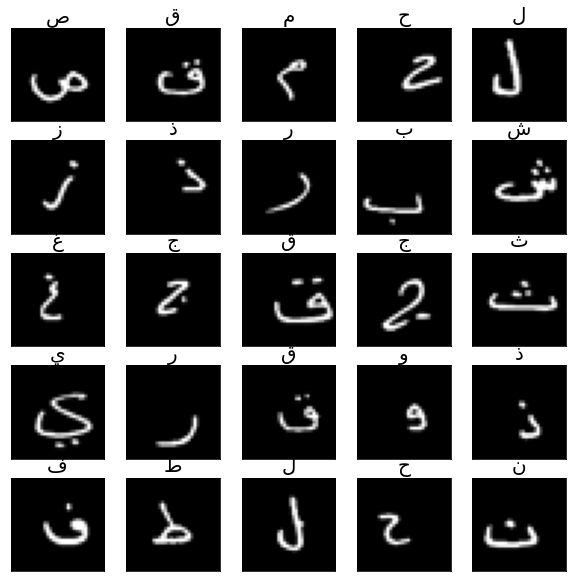

In [6]:
# Les alphabets (en arabe)
arabic_chars =list('ابتثجحخدذرزسشصضطظعغفقكلمنهوي')
arabic_chars

ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32),"gray")
    plt.title(arabic_chars[int(y_train[ra[i]][0])], fontsize = 20)
plt.show()

In [7]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

y_train_h = to_categorical(y_train)
y_test_h = to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train_h.shape, y_test_h.shape)

(13440,) (3360,)
(13440, 28) (3360, 28)


In [8]:
x_train = x_train.reshape(-1,32,32, 1)
x_test = x_test.reshape(-1,32,32, 1)

train_datagen=ImageDataGenerator(
#rescale=1/255, # Normalize the new images
# Augmentation dat
    zoom_range=0.2, #Zoom
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1, #Shear angle in counter-clockwise direction in degrees
    fill_mode='nearest',
    
#rotation_range=20, 
)
train_generator=train_datagen.flow(
    x_train ,y_train ,batch_size=64
)

test_datagen=ImageDataGenerator()

test_generator=test_datagen.flow(
    x_test ,y_test ,batch_size=64
 
)

In [9]:
earlystop = EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience= 3,
    verbose=1,
)
callbacks = [earlystop, learning_rate_reduction]

In [10]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(256,(5,5),activation='relu',input_shape=(32,32,1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128,(5,5),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(28, kernel_regularizer=keras.regularizers.l2(0.01) ,activation='softmax'))

In [11]:
model.compile(optimizer= 'adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 256)       6656      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 128)       819328    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 128)         0         
                                                                 
 flatten (Flatten)           (None, 3200)              0

In [13]:
model.fit(
    train_generator, 
    epochs=20,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/20
210/210 [==============================] - 208s 976ms/step - loss: 2.0564 - accuracy: 0.4343 - val_loss: 0.7743 - val_accuracy: 0.8048 - lr: 0.0010
Epoch 2/20
210/210 [==============================] - 216s 1s/step - loss: 1.0376 - accuracy: 0.7089 - val_loss: 0.5362 - val_accuracy: 0.8744 - lr: 0.0010
Epoch 3/20
210/210 [==============================] - 204s 971ms/step - loss: 0.7868 - accuracy: 0.7842 - val_loss: 0.4316 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 4/20
210/210 [==============================] - 218s 1s/step - loss: 0.6697 - accuracy: 0.8161 - val_loss: 0.3991 - val_accuracy: 0.9119 - lr: 0.0010
Epoch 5/20
210/210 [==============================] - 202s 961ms/step - loss: 0.5768 - accuracy: 0.8499 - val_loss: 0.3260 - val_accuracy: 0.9304 - lr: 0.0010
Epoch 6/20
210/210 [==============================] - 187s 889ms/step - loss: 0.5292 - accuracy: 0.8611 - val_loss: 0.2922 - val_accuracy: 0.9423 - lr: 0.0010
Epoch 7/20
210/210 [==============================] 

<AxesSubplot:>

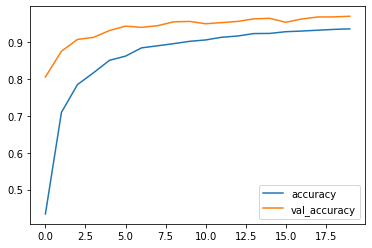

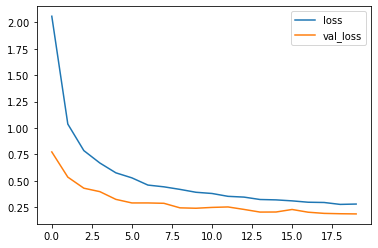

In [14]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [15]:
model.evaluate(test_generator)

53/53 [==============================] - 11s 207ms/step - loss: 0.1886 - accuracy: 0.9690


[0.18856532871723175, 0.9690476059913635]

In [16]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
print(pred)

105/105 [==============================] - 12s 112ms/step
[26  0 26 ...  1 24 17]


Text(0.5, 1.0, 'ر')

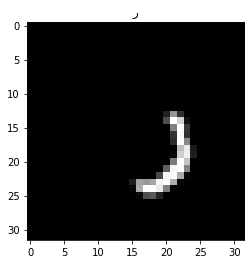

In [17]:
plt.imshow(x_test[14].reshape(32,32),"gray")
plt.title(arabic_chars[pred[14]])

In [18]:
model.save('model_alphabet_arabe.h5')